In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid") # seabornの背景色を白に変更

## 二値化
二値化は度数が非常に高い部分がある裾の重い分布に対して有力な変換である. 二値化を行うことで機械学習モデルが裾の重いインスタンスに引っ張られて正確な予測ができなくなることを防ぐ. ここでは曲の再生回数のデータを用いて二値化を行う.

In [2]:
# read data
listen_count = pd.read_csv("./Data/train_triplets.txt.zip",header=None,delimiter="\t")
listen_count = listen_count.rename(columns={0:"Users",1:"MSD songs",2:"Play counts"})
listen_count.head()

,Users,MSD songs,Play counts
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [4]:
listen_count.shape

(48373586, 3)

Text(0, 0.5, 'count')

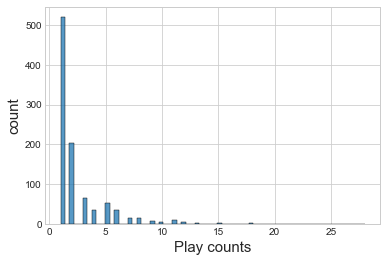

In [8]:
# メモリ足りないから1000レコードのみ表示
g = sns.histplot(data=listen_count["Play counts"][:1000])
g.set_xlabel("Play counts",fontsize=15)
g.set_ylabel("count",fontsize=15)

In [9]:
# 二値化
listen_count.loc[listen_count["Play counts"]>0 ,"Play counts"] = 1

Text(0, 0.5, 'count')

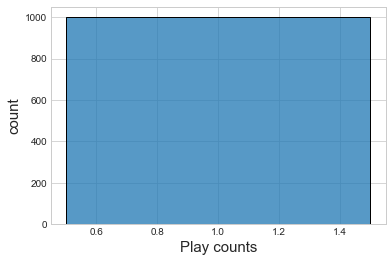

In [10]:
# メモリ足りないから1000レコードのみ表示
# 個のデータは再生数1以上のデータのみで構成されているため全部1になる(コードは0に対応)
g = sns.histplot(data=listen_count["Play counts"][:1000])
g.set_xlabel("Play counts",fontsize=15)
g.set_ylabel("count",fontsize=15)

## 離散化
二値化同様に,離散化は度数が非常に高い部分がある重い裾の分布で有力な手法である. 離散化の手法として固定幅による離散化と分位数による離散化の2つがある. 固定幅による離散化ではランダム生成したデータ, 分位数による離散化ではレストランのレビューデータを用いて離散化を行う.

### 固定幅による離散化

In [13]:
# 規則性がある場合
# データ生成
small_counts = np.random.randint(0,100,20)
print("before :",small_counts)

# 固定幅による離散化
# np.floor_divide(data,階級の割り当て)
discreated_counts = np.floor_divide(small_counts,10)
print("after :",discreated_counts)

before : [88 36 15 24 26 69 20 11 60 83 27 98 52 28  3 63 24 42 75 71]
after : [8 3 1 2 2 6 2 1 6 8 2 9 5 2 0 6 2 4 7 7]


In [16]:
# 10の累乗で離散化
# データ生成
large_counts = np.random.randint(0,10000,20)
print("before :",large_counts)

# 固定幅による離散化
# np.floor_divide(data,階級の割り当て)
discreated_counts = np.floor(np.log(large_counts))
print("after :",discreated_counts)

before : [3749   46 6190 2410 2819  143 3022 8224 8306 4914 3005  908 3666 2403
 4938 2003  720 2915 8574 1418]
after : [8. 3. 8. 7. 7. 4. 8. 9. 9. 8. 8. 6. 8. 7. 8. 7. 6. 7. 9. 7.]


### 分位数による離散化